# scipy.linalg notebook

### setup

In [1]:
import numpy as np
import scipy
from scipy import linalg
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display,Latex,Math
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
sh = InteractiveShell.instance()


I change the output for np.array and np.matrix for nice print in LaTex.

In [2]:
def number_to_str(n,cut=5):
    ns=str(n)
    format_='{0:.'+str(cut)+'f}'
    if 'e' in ns or ('.' in ns and len(ns)>cut+1):
        return format_.format(n)
    else:
        return str(n)

def matrix_to_latex(mat,style='bmatrix'):
    if type(mat)==np.matrixlib.defmatrix.matrix:
        mat=mat.A
    head=r'\begin{'+style+'}'
    tail=r'\end{'+style+'}'
    if len(mat.shape)==1:
        body=r'\\'.join([str(el) for el in mat])
        return head+body+tail
    elif len(mat.shape)==2:
        lines=[]
        for row in mat:
            lines.append('&'.join([number_to_str(el)  for el in row])+r'\\')
        s=head+' '.join(lines)+tail
        return s
    return None


In [3]:
sh.display_formatter.formatters['text/latex'].type_printers[np.ndarray]=matrix_to_latex

In [4]:
np.array([[1,2],[3,4]])

array([[1, 2],
       [3, 4]])

In [5]:
np.matrix([1,2])

matrix([[1, 2]])

In [6]:
np.array([1,2])

array([1, 2])

In [7]:
np.matrix([[1],[2]])

matrix([[1],
        [2]])

In [8]:
a=np.array([1,2])
b=np.array([3,4])
a

array([1, 2])

In [9]:
np.dot(a,b)

11

In [10]:
A=np.array([[1,2],[3,4]])
A

array([[1, 2],
       [3, 4]])

In [11]:
np.dot(A,a)

array([ 5, 11])

In [12]:
A=np.array([[1,2],[3,4]])
A

array([[1, 2],
       [3, 4]])

In [13]:
linalg.inv(A)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [14]:
A.dot(linalg.inv(A))

array([[  1.00000000e+00,   0.00000000e+00],
       [  8.88178420e-16,   1.00000000e+00]])

In [15]:
b=np.array([[5],[6]])
b

array([[5],
       [6]])

In [16]:
np.linalg.solve(A,b)

array([[-4. ],
       [ 4.5]])

In [17]:
np.dot(linalg.inv(A),b)

array([[-4. ],
       [ 4.5]])

In [18]:
linalg.det(A)

-2.0

In [19]:
linalg.norm(A)

5.4772255750516612

However,`linalg.norm` is a function to compute matrix norm number.In this(deafault) case,it ccompute 2-norm,the max $\sigma_i$ ,where $\sigma$ is singular value.In other case,we can run a singular value decomposition for that.

$$
A=U\Sigma V^H
$$

In [20]:
U,Sigma,VH=linalg.svd(A)

In [21]:
Sigma

array([ 5.4649857 ,  0.36596619])

It's confusing,it gave number different too big.

## pseudo-inverse and least-squares problems

The pseudo-inverse of matrix $A$ is defined as $(A^HA)^{-1}A^H$ if $A^HA$ is invertible.For example:

In [22]:
D=np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15]])
D

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12],
       [13, 14, 15]])

In [23]:
np.dot(np.invert(np.dot(D.T,D)),D.T)

array([[ -2296,  -5635,  -8974, -12313, -15652],
       [ -2546,  -6245,  -9944, -13643, -17342],
       [ -2796,  -6855, -10914, -14973, -19032]])

In [24]:
np.dot(np.dot(np.invert(np.dot(D.T,D)),D.T),D)

array([[-414260, -459130, -504000],
       [-459010, -508730, -558450],
       [-503760, -558330, -612900]])

In [25]:
np.dot(D,np.dot(np.invert(np.dot(D.T,D)),D.T))

array([[ -15776,  -38690,  -61604,  -84518, -107432],
       [ -38690,  -94895, -151100, -207305, -263510],
       [ -61604, -151100, -240596, -330092, -419588],
       [ -84518, -207305, -330092, -452879, -575666],
       [-107432, -263510, -419588, -575666, -731744]])

It appear in least-squares problems,if we let $pi(A)$ be the pseudo-inverse of $A$,then
$$c=pi(A)b$$
for
$$\underset{c}{min} \sum_{i=1}^m((\sum_{j=1}^n A_{ij}c_j)-b_i)^2$$

In [26]:
c1,c2=5.0,2.0
i=np.r_[1:11]
np.matrix(i)

matrix([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]])

In [27]:
xi=0.1*i
yi=c1*np.exp(-xi)+c2*xi
yi

array([ 4.72418709,  4.49365377,  4.3040911 ,  4.15160023,  4.0326533 ,
        3.94405818,  3.88292652,  3.84664482,  3.8328483 ,  3.83939721])

In [28]:
zi=yi+0.05*np.max(yi)*np.random.randn(len(yi))

In [29]:
zi

array([ 4.92537124,  5.03451841,  3.98139162,  4.15321228,  3.89421098,
        3.83964806,  3.22940337,  3.81551828,  4.00864386,  3.67647267])

In [30]:
A=np.c_[np.exp(-xi)[:,np.newaxis],xi[:,np.newaxis]]
A

array([[ 0.90483742,  0.1       ],
       [ 0.81873075,  0.2       ],
       [ 0.74081822,  0.3       ],
       [ 0.67032005,  0.4       ],
       [ 0.60653066,  0.5       ],
       [ 0.54881164,  0.6       ],
       [ 0.4965853 ,  0.7       ],
       [ 0.44932896,  0.8       ],
       [ 0.40656966,  0.9       ],
       [ 0.36787944,  1.        ]])

In [31]:
c,resid,rank,sigma=linalg.lstsq(A,zi)
c

array([ 5.18893273,  1.70929007])

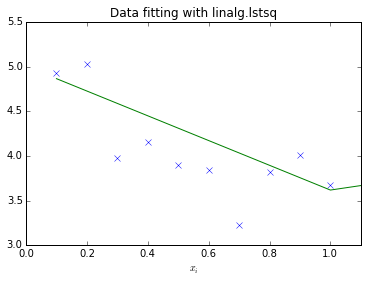

In [32]:
xi2=np.r_[0.1,1.0:100]
yi2=c[0]*np.exp(-xi2)+c[1]*xi2
plt.plot(xi,zi,'x',xi2,yi2)
plt.axis([0,1.1,3.0,5.5])
plt.xlabel('$x_i$')
plt.title('Data fitting with linalg.lstsq')
plt.show()

In [33]:
np.r_[0.1,1.0:100j]

array([ 0.1+0.j])

In [34]:
D=np.matrix(D)
np.dot(np.invert(np.dot(D.T,D)),D.T)

matrix([[ -2296,  -5635,  -8974, -12313, -15652],
        [ -2546,  -6245,  -9944, -13643, -17342],
        [ -2796,  -6855, -10914, -14973, -19032]])

In [35]:
linalg.pinv(D)

array([[ -3.88888889e-01,  -2.44444444e-01,  -1.00000000e-01,
          4.44444444e-02,   1.88888889e-01],
       [ -2.22222222e-02,  -1.11111111e-02,  -4.85722573e-17,
          1.11111111e-02,   2.22222222e-02],
       [  3.44444444e-01,   2.22222222e-01,   1.00000000e-01,
         -2.22222222e-02,  -1.44444444e-01]])

In [36]:
linalg.pinv2(D)

array([[ -3.88888889e-01,  -2.44444444e-01,  -1.00000000e-01,
          4.44444444e-02,   1.88888889e-01],
       [ -2.22222222e-02,  -1.11111111e-02,  -4.31918492e-17,
          1.11111111e-02,   2.22222222e-02],
       [  3.44444444e-01,   2.22222222e-01,   1.00000000e-01,
         -2.22222222e-02,  -1.44444444e-01]])

In [37]:
 (D.T*D).I*D.T

matrix([[ 0.15625   ,  0.09375   ,  0.046875  ,  0.0625    ,  0.015625  ],
        [-1.09375   , -0.6875    , -0.21875   ,  0.125     ,  0.46875   ],
        [ 0.89453125,  0.5703125 ,  0.24609375,  0.015625  , -0.40234375]])

It's not match! However MatLab give same value for `linalg.pinv` and all inf matrix to third compute beacause "Warning: Matrix is singular to working precision. "It's a poor number example.

In [38]:
A=np.matrix(np.random.rand(5,3))
A

matrix([[ 0.6499728 ,  0.89450088,  0.22237218],
        [ 0.35518321,  0.69095024,  0.21852958],
        [ 0.85009898,  0.95257335,  0.20702451],
        [ 0.26824149,  0.77371401,  0.08211686],
        [ 0.68567994,  0.85270342,  0.17009701]])

In [39]:
linalg.pinv(A)

array([[ -6.71493818e-03,  -1.67288749e+00,   1.60026219e+00,
         -1.49649969e+00,   9.32779409e-01],
       [ -2.33162927e-01,  -1.80276609e-01,  -4.99781219e-01,
          2.30102737e+00,   3.38543996e-02],
       [  2.28846929e+00,   7.12858124e+00,  -1.56096895e+00,
         -4.85612734e+00,  -2.02689644e+00]])

In [40]:
 (A.T*A).I*A.T

matrix([[ -6.71493818e-03,  -1.67288749e+00,   1.60026219e+00,
          -1.49649969e+00,   9.32779409e-01],
        [ -2.33162927e-01,  -1.80276609e-01,  -4.99781219e-01,
           2.30102737e+00,   3.38543996e-02],
        [  2.28846929e+00,   7.12858124e+00,  -1.56096895e+00,
          -4.85612734e+00,  -2.02689644e+00]])

So,in this case,it works.

## Decompositions

### Eigenvalues and eigenvectors

In [41]:
A=np.matrix([[1,5,2],[2,4,1],[3,6,2]])
A

matrix([[1, 5, 2],
        [2, 4, 1],
        [3, 6, 2]])

In [42]:
lam,v=linalg.eig(A)
lam

array([ 7.95791620+0.j, -1.25766471+0.j,  0.29974850+0.j])

In [43]:
v

array([[-0.5297175 , -0.90730751,  0.28380519],
       [-0.44941741,  0.28662547, -0.39012063],
       [-0.71932146,  0.30763439,  0.87593408]])

So,we can check the definition.
$$Ax=\lambda x$$

In [44]:
v[:,0]

array([-0.5297175 , -0.44941741, -0.71932146])

In [45]:
np.dot(A,v[:,0])/v[:,0]

matrix([[ 7.9579162,  7.9579162,  7.9579162]])

and decomposition property
$$A=V\lambda V^{-1}$$

In [46]:
np.diag(lam)

array([[ 7.95791620+0.j,  0.00000000+0.j,  0.00000000+0.j],
       [ 0.00000000+0.j, -1.25766471+0.j,  0.00000000+0.j],
       [ 0.00000000+0.j,  0.00000000+0.j,  0.29974850+0.j]])

In [47]:
v=np.matrix(v)
lam=np.diag(lam)
(v*lam*v.I).real

matrix([[ 1.,  5.,  2.],
        [ 2.,  4.,  1.],
        [ 3.,  6.,  2.]])

So we can run iteration quickly,
$$A^{10}x=V\lambda^{10} V^{-1}x$$

In [48]:
A**10

matrix([[253739432, 603134323, 186409663],
        [215274961, 511704953, 158151752],
        [344561415, 819016671, 253132045]])

In [49]:
(v*lam**10*v.I).real

matrix([[  2.53739432e+08,   6.03134323e+08,   1.86409663e+08],
        [  2.15274961e+08,   5.11704953e+08,   1.58151752e+08],
        [  3.44561415e+08,   8.19016671e+08,   2.53132045e+08]])

Gram–Schmidt process indicate all real symmetric matrix can find a orthogonal matrix to eigenvalues  decomposition.
$$
\begin{aligned}
&\text{for all } &A&=A^T \\
&\text{exist } &O^T&=O^{-1} \\
&\text{st. } &A&=O\lambda O^T
\end{aligned}
$$

In [50]:
def proj(u,v):
    return (np.dot(v,u)/np.dot(u,u))*u

def Gram_Schmidt_process(vector_l):
    u_l=[vector_l[0]]
    for i in range(1,len(vector_l)):
        u_i=vector_l[i].copy()
        for j in range(i):
            u_i-=proj(u_l[j],vector_l[i])
        u_l.append(u_i)
    return [u/np.sqrt(np.dot(u,u)) for u in u_l]

a1=np.array([1,-1,0])
a2=np.array([-1,1,1])
a3=np.array([1,1,1])

Gram_Schmidt_process([a1,a2,a3])

[array([ 0.70710678, -0.70710678,  0.        ]),
 array([ 0.,  0.,  1.]),
 array([ 0.70710678,  0.70710678,  0.        ])]

In [51]:
B=np.matrix([[0,1,1,-1],
            [1,0,-1,1],
            [1,-1,0,1],
            [-1,1,1,0]])
B

matrix([[ 0,  1,  1, -1],
        [ 1,  0, -1,  1],
        [ 1, -1,  0,  1],
        [-1,  1,  1,  0]])

In [52]:
lam,v=linalg.eig(B)
lam.real

array([ 1., -3.,  1.,  1.])

In [53]:
v

array([[ 0.8660254 ,  0.5       ,  0.41381232,  0.15075567],
       [ 0.28867513, -0.5       ,  0.85519107,  0.05025189],
       [ 0.28867513, -0.5       , -0.22068937,  0.74656251],
       [-0.28867513,  0.5       ,  0.22068937,  0.64605873]])

In [54]:
np.dot(B,v[:,0])

matrix([[ 0.8660254 ,  0.28867513,  0.28867513, -0.28867513]])

In [55]:
v1,v2,v3,v4=[v[:,i] for i in range(4)]
v2

array([ 0.5, -0.5, -0.5,  0.5])

In [56]:
v1,v3,v4=Gram_Schmidt_process([v1,v3,v4])
v1,v3,v4

(array([ 0.8660254 ,  0.28867513,  0.28867513, -0.28867513]),
 array([ -1.26383927e-16,   8.16496581e-01,  -4.08248290e-01,
          4.08248290e-01]),
 array([  2.81859203e-17,  -2.02342556e-17,   7.07106781e-01,
          7.07106781e-01]))

In [57]:
V=np.matrix(np.concatenate([v1,v2,v3,v4]).reshape(4,4).T)
V

matrix([[  8.66025404e-01,   5.00000000e-01,  -1.26383927e-16,
           2.81859203e-17],
        [  2.88675135e-01,  -5.00000000e-01,   8.16496581e-01,
          -2.02342556e-17],
        [  2.88675135e-01,  -5.00000000e-01,  -4.08248290e-01,
           7.07106781e-01],
        [ -2.88675135e-01,   5.00000000e-01,   4.08248290e-01,
           7.07106781e-01]])

In [58]:
(V*np.diag(lam)*V.T).real

matrix([[  3.33066907e-16,   1.00000000e+00,   1.00000000e+00,
          -1.00000000e+00],
        [  1.00000000e+00,  -1.11022302e-16,  -1.00000000e+00,
           1.00000000e+00],
        [  1.00000000e+00,  -1.00000000e+00,  -1.66533454e-16,
           1.00000000e+00],
        [ -1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
           1.11022302e-16]])

In [59]:
V*V.T

matrix([[  1.00000000e+00,  -7.54364688e-17,   9.92820532e-17,
          -5.94211425e-17],
        [ -7.54364688e-17,   1.00000000e+00,  -5.55111512e-17,
           5.55111512e-17],
        [  9.92820532e-17,  -5.55111512e-17,   1.00000000e+00,
           5.55111512e-17],
        [ -5.94211425e-17,   5.55111512e-17,   5.55111512e-17,
           1.00000000e+00]])

In [60]:
type(V)

numpy.matrixlib.defmatrix.matrix

In [61]:
np.matrix(v).I

matrix([[  8.66025404e-01,  -1.55453497e-01,   3.85739450e-01,
          -6.35739450e-01],
        [  5.00000000e-01,  -5.00000000e-01,  -5.00000000e-01,
           5.00000000e-01],
        [  6.52521505e-19,   9.29471305e-01,  -4.64735653e-01,
           4.64735653e-01],
        [ -1.32869702e-17,   0.00000000e+00,   7.18070331e-01,
           7.18070331e-01]])

### Singular value decomposition

In [62]:
A=np.array([[1,2,3],[4,5,6]])
A

array([[1, 2, 3],
       [4, 5, 6]])

In [63]:
U,s,Vh=linalg.svd(A)
s

array([ 9.508032  ,  0.77286964])

In [64]:
np.dot(np.dot(U,linalg.diagsvd(s,*A.shape)),Vh)

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.]])

In [65]:
linalg.diagsvd(s,*A.shape)

array([[ 9.508032  ,  0.        ,  0.        ],
       [ 0.        ,  0.77286964,  0.        ]])

In [66]:
Vh

array([[-0.42866713, -0.56630692, -0.7039467 ],
       [ 0.80596391,  0.11238241, -0.58119908],
       [ 0.40824829, -0.81649658,  0.40824829]])

In [67]:
def show_decomposition(*args):
    latex=''
    for arg in args:
        if type(arg)==str:
            latex+=arg
        else:
            latex+=matrix_to_latex(arg)
    latex='$'+latex+'$'
    display(Math(latex))
    
            

In [68]:
show_decomposition(A,'=',U,linalg.diagsvd(s,*A.shape),Vh)

<IPython.core.display.Math object>

### application : compress

In [69]:
A=np.array(range(30)).reshape(10,3)

In [70]:
U,s,Vh=linalg.svd(A)
show_decomposition(A,'=',U,linalg.diagsvd(s,*A.shape),Vh)

<IPython.core.display.Math object>

In [71]:
S=linalg.diagsvd(s,*A.shape)
S

array([[  9.24650709e+01,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   2.28268585e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   3.69636398e-15],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [72]:
U[:,:3]

array([[-0.01935204,  0.58743514,  0.80777442],
       [-0.07549922,  0.49273189, -0.31970217],
       [-0.13164641,  0.39802864, -0.30496669],
       [-0.1877936 ,  0.30332539, -0.23971429],
       [-0.24394078,  0.20862214, -0.16916965],
       [-0.30008797,  0.11391889, -0.09407502],
       [-0.35623516,  0.01921564, -0.03040361],
       [-0.41238234, -0.07548761,  0.03020231],
       [-0.46852953, -0.17019086,  0.11365468],
       [-0.52467672, -0.26489411,  0.20640001]])

In [73]:
S[:3]

array([[  9.24650709e+01,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   2.28268585e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   3.69636398e-15]])

In [74]:
(U[:,:3].dot(S[:3])).dot(Vh)

array([[  1.13308346e-16,   1.00000000e+00,   2.00000000e+00],
       [  3.00000000e+00,   4.00000000e+00,   5.00000000e+00],
       [  6.00000000e+00,   7.00000000e+00,   8.00000000e+00],
       [  9.00000000e+00,   1.00000000e+01,   1.10000000e+01],
       [  1.20000000e+01,   1.30000000e+01,   1.40000000e+01],
       [  1.50000000e+01,   1.60000000e+01,   1.70000000e+01],
       [  1.80000000e+01,   1.90000000e+01,   2.00000000e+01],
       [  2.10000000e+01,   2.20000000e+01,   2.30000000e+01],
       [  2.40000000e+01,   2.50000000e+01,   2.60000000e+01],
       [  2.70000000e+01,   2.80000000e+01,   2.90000000e+01]])

In [75]:
U[:,:2]

array([[-0.01935204,  0.58743514],
       [-0.07549922,  0.49273189],
       [-0.13164641,  0.39802864],
       [-0.1877936 ,  0.30332539],
       [-0.24394078,  0.20862214],
       [-0.30008797,  0.11391889],
       [-0.35623516,  0.01921564],
       [-0.41238234, -0.07548761],
       [-0.46852953, -0.17019086],
       [-0.52467672, -0.26489411]])

In [76]:
S[:2,:2]

array([[ 92.46507095,   0.        ],
       [  0.        ,   2.28268585]])

In [77]:
Vh[:2]

array([[-0.54743233, -0.5768504 , -0.60626847],
       [-0.73051432, -0.02401975,  0.68247482]])

In [78]:
np.dot(np.dot(U[:,:2],S[:2,:2]),Vh[:2])

array([[  1.36366708e-15,   1.00000000e+00,   2.00000000e+00],
       [  3.00000000e+00,   4.00000000e+00,   5.00000000e+00],
       [  6.00000000e+00,   7.00000000e+00,   8.00000000e+00],
       [  9.00000000e+00,   1.00000000e+01,   1.10000000e+01],
       [  1.20000000e+01,   1.30000000e+01,   1.40000000e+01],
       [  1.50000000e+01,   1.60000000e+01,   1.70000000e+01],
       [  1.80000000e+01,   1.90000000e+01,   2.00000000e+01],
       [  2.10000000e+01,   2.20000000e+01,   2.30000000e+01],
       [  2.40000000e+01,   2.50000000e+01,   2.60000000e+01],
       [  2.70000000e+01,   2.80000000e+01,   2.90000000e+01]])

In [79]:
U[:,:1]

array([[-0.01935204],
       [-0.07549922],
       [-0.13164641],
       [-0.1877936 ],
       [-0.24394078],
       [-0.30008797],
       [-0.35623516],
       [-0.41238234],
       [-0.46852953],
       [-0.52467672]])

In [80]:
S[:1,:1]

array([[ 92.46507095]])

In [81]:
Vh[:1]

array([[-0.54743233, -0.5768504 , -0.60626847]])

In [82]:
np.dot(np.dot(U[:,:1],S[:1,:1]),Vh[:1])

array([[  0.97956848,   1.0322088 ,   1.08484912],
       [  3.82164753,   4.02701627,   4.23238501],
       [  6.66372657,   7.02182373,   7.37992089],
       [  9.50580562,  10.01663119,  10.52745677],
       [ 12.34788466,  13.01143866,  13.67499266],
       [ 15.1899637 ,  16.00624612,  16.82252854],
       [ 18.03204275,  19.00105358,  19.97006442],
       [ 20.87412179,  21.99586105,  23.1176003 ],
       [ 23.71620084,  24.99066851,  26.26513619],
       [ 26.55827988,  27.98547598,  29.41267207]])

In [83]:
show_decomposition(A,r'\approx',np.dot(np.dot(U[:,:1],S[:1,:1]),Vh[:1]),'=',U[:,:1],S[:1,:1],Vh[:1])

<IPython.core.display.Math object>

How amazing compress!If you use a proper bigger matrix,you will get splendid percent!